<a href="https://colab.research.google.com/github/Gus-1003/DataScience/blob/main/An%C3%A1lise_Dataset_REMS_Mars/Av3_Ci%C3%AAncia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - 3ª Unidade - Fundamentos e Técnicas em ciências de Dados

## ***Capitulo1:*** Contexto da Atividade

### Cabeçalho:

Instituição: Escola Agricula de Jundiaí - EAJ - Macaiba - RN

Vinculo: Universidade Federal do Rio Grande do Norte - UFRN

Curso: Analise e Desenvolvimento de Sistemas - TADS

Docente: Laura Emmanuela

Discentes: Gustavo Maciel; Oseias Batista;

Data da Entrega: 11/02/2022

### Contexto do dataset:

Tema: ‎
*   Estação de Monitoramento Ambiental MARS Rover ‎
  *   ‎Dados meteorológicos e ambientais para o planeta Marte

Fonte: https://www.kaggle.com/deepcontractor/mars-rover-environmental-monitoring-station







### Hipoteses:

*   Existe uma correlação entre a temperatura maxima do ar com a temperatura maxima do solo em marte;
*   A duração dos dias deve correlacionar diretamente com o grau de radiação ultra violeta medido pelos sensores;
*   Deve haver alguma alta correlação entre o grau da radiação com a temperatura do ar e do solo
*   Em dias mais quentes a pressão atmosferica deve ser menor que em dias mais frios;



## ***Capitulo 2:*** Import das Bibliotecas e Carregar Dataset

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [53]:
Dataframe = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/DataScience/main/An%C3%A1lise_Dataset_REMS_Mars/REMS_Mars_Dataset.csv')

### Demonstração do Dataframe original:

In [54]:
Dataframe

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),wind_speed(m/h),humidity(%),sunrise,sunset,UV_Radiation,weather
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,Value not available,Value not available,05:25,17:21,moderate,Sunny
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,Value not available,Value not available,05:26,17:21,moderate,Sunny
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,Value not available,Value not available,05:26,17:21,moderate,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,"Earth, 2012-08-18 UTC","Mars, Month 6 - LS 156°",Sol 12,-18,-76,8,-82,741,Value not available,Value not available,05:28,17:21,very_high,Sunny
3193,"Earth, 2012-08-17 UTC","Mars, Month 6 - LS 156°",Sol 11,-11,-76,9,-83,740,Value not available,Value not available,05:28,17:21,very_high,Sunny
3194,"Earth, 2012-08-16 UTC","Mars, Month 6 - LS 155°",Sol 10,-16,-75,8,-83,739,Value not available,Value not available,05:28,17:22,very_high,Sunny
3195,"Earth, 2012-08-15 UTC","Mars, Month 6 - LS 155°",Sol 9,Value not available,Value not available,Value not available,Value not available,Value not available,Value not available,Value not available,05:28,17:22,NaN,Sunny


In [55]:
#mostra tipo de dados das colunas 
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   earth_date_time      3197 non-null   object
 1   mars_date_time       3197 non-null   object
 2   sol_number           3197 non-null   object
 3   max_ground_temp(°C)  3197 non-null   object
 4   min_ground_temp(°C)  3197 non-null   object
 5   max_air_temp(°C)     3197 non-null   object
 6   min_air_temp(°C)     3197 non-null   object
 7   mean_pressure(Pa)    3197 non-null   object
 8   wind_speed(m/h)      3197 non-null   object
 9   humidity(%)          3197 non-null   object
 10  sunrise              3197 non-null   object
 11  sunset               3197 non-null   object
 12  UV_Radiation         3170 non-null   object
 13  weather              3197 non-null   object
dtypes: object(14)
memory usage: 349.8+ KB


informações extraidas nesse momento:

*   14 colunas - Atributos;
    * Todas as colunas são categoricas (Compostas por string)
    * Das 14, 4 colunas possuem vinculo com data historica
    * Das 10 restantes, 5 colunas podem ser transformadas em inteiros
    * Das 5 restantes, 2 aparentam estar inutilizaveis (Velocidade do vento e humidade)
*   3197 linha - Registros;
    * Há 27 campos vazios na coluna de UV_Radiation;
    * Outras colunas podem também não possuir dados mas inves de estarem vazias terem *value not available* ocupando o campo;
    * Os 2 primeiros registros apresentam atributos não avaliados (Pode haver mais);



## ***Capitulo 3:*** Analise Exploratoria:

***Objetivo:*** Conhecer os dados antes de aplicar qualquer transformação neles, ou seja, antes de tirar qualquer conclusão;

Tipos de tecnicas:
*   Quantitaivas;
  *   Frequência - Atributo assume um mesmo valor;
  *   Localização - Pontos de referência;
      *   Atributos Numericos - Média - posição equidistante dos extremos;
      *   Descio padrão;
      *   Atributos Categoricos - Moda - Valor encontrado com maior frequência;
  *   Dispersão / espalhamento;
      *   Descio padrão;
      *   Intervalo; 

*   Visuais;
  *  Diagrama de Disperção - Relacionar variáveis numéricas;
  *  Diagrama de Caixa
  *  Histograma
  *  Nuvem de Palavras

*   Aprendizagem de Maquina
  *  Supervisionado;
  *  Não - Supervisionado;



### Limpeza geral do Dataset:

#### Limpeza das linhas:

Objetivo: Remover as linhas que possuem o termo "Value not available"

In [56]:
Dataframe.drop(Dataframe.index[Dataframe['min_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['min_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['mean_pressure(Pa)'] == 'Value not available'], inplace = True)

Mostrar os tipos de dados nas colunas:

In [57]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3194
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   earth_date_time      3168 non-null   object
 1   mars_date_time       3168 non-null   object
 2   sol_number           3168 non-null   object
 3   max_ground_temp(°C)  3168 non-null   object
 4   min_ground_temp(°C)  3168 non-null   object
 5   max_air_temp(°C)     3168 non-null   object
 6   min_air_temp(°C)     3168 non-null   object
 7   mean_pressure(Pa)    3168 non-null   object
 8   wind_speed(m/h)      3168 non-null   object
 9   humidity(%)          3168 non-null   object
 10  sunrise              3168 non-null   object
 11  sunset               3168 non-null   object
 12  UV_Radiation         3168 non-null   object
 13  weather              3168 non-null   object
dtypes: object(14)
memory usage: 500.3+ KB


informações extraidas nesse momento:

*   3197 linha -> 3168;
    * 29 linhas foram apagadas, ou seja, 29 linhas possuiam "Value not available" em algum dos campos das 5 colunas apostadas

#### Limpeza das Colunas:

Remoção das colunas que não são uteis:
*   wind_speed(m/h) - Só possuia not available
*   humidity(%) - Só possuia not available 
*   weather - Só possuia summer



In [58]:
Dataframe = Dataframe.drop(columns=['wind_speed(m/h)'])
Dataframe = Dataframe.drop(columns=['humidity(%)'])
Dataframe = Dataframe.drop(columns=['weather'])

Mostra os tipos de dados das colunas:

In [59]:
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3194
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   earth_date_time      3168 non-null   object
 1   mars_date_time       3168 non-null   object
 2   sol_number           3168 non-null   object
 3   max_ground_temp(°C)  3168 non-null   object
 4   min_ground_temp(°C)  3168 non-null   object
 5   max_air_temp(°C)     3168 non-null   object
 6   min_air_temp(°C)     3168 non-null   object
 7   mean_pressure(Pa)    3168 non-null   object
 8   sunrise              3168 non-null   object
 9   sunset               3168 non-null   object
 10  UV_Radiation         3168 non-null   object
dtypes: object(11)
memory usage: 426.0+ KB


### Adaptação dos dados:

#### Transformação: Strings -> Int´s

In [60]:
# Tranforma as colunas de string para int
Dataframe['min_ground_temp(°C)'] = Dataframe['min_ground_temp(°C)'].astype(int)
Dataframe['max_ground_temp(°C)'] = Dataframe['max_ground_temp(°C)'].astype(int)
Dataframe['min_air_temp(°C)'] = Dataframe['min_air_temp(°C)'].astype(int)
Dataframe['max_air_temp(°C)'] = Dataframe['max_air_temp(°C)'].astype(int)
Dataframe['mean_pressure(Pa)'] = Dataframe['mean_pressure(Pa)'].astype(int)

In [61]:
#mostra tipo de dados das colunas 
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3194
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   earth_date_time      3168 non-null   object
 1   mars_date_time       3168 non-null   object
 2   sol_number           3168 non-null   object
 3   max_ground_temp(°C)  3168 non-null   int64 
 4   min_ground_temp(°C)  3168 non-null   int64 
 5   max_air_temp(°C)     3168 non-null   int64 
 6   min_air_temp(°C)     3168 non-null   int64 
 7   mean_pressure(Pa)    3168 non-null   int64 
 8   sunrise              3168 non-null   object
 9   sunset               3168 non-null   object
 10  UV_Radiation         3168 non-null   object
dtypes: int64(5), object(6)
memory usage: 426.0+ KB


informações extraidas nesse momento:

*   Os dados foram transformados com sucesso;
*   Interesse por modificações:
    *  sol_number = quantidade de dias em operação;
    *  sunsise / sunset = horas e minutos em segundos
    *  UV_Radiation = grau de radiação -> Números ordinais

### Demonstração pós pré-processamento:

#### Novas coletas de infomações(Dataset)

In [62]:
#inclui apenas colunas categóricas na descrição
Dataframe.describe(include='object')

,earth_date_time,mars_date_time,sol_number,sunrise,sunset,UV_Radiation
count,3168,3168,3168,3168,3168,3168
unique,3168,360,3168,90,96,4
top,"Earth, 2022-01-26 UTC","Mars, Month 3 - LS 72°",Sol 3368,05:18,17:20,moderate
freq,1,12,1,170,198,1449


*  unique: quantidade de valores únicos
*  top: é o valor mais comum
*  freq: é a frequência do valor mais comum

informações extraidas nesse momento (Dados Categoricos):

*   3168 linha -> Registros;
    * UV_Radiation só possui 4 valores unicos (4 niveis / categorias)
    * Os dias na terra e o número solar(Qº de dias em marte) são unicos;

In [63]:
#descrição estatística das colunas numéricas
Dataframe.describe()

,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa)
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,-13.204545,-75.015152,2.010732,-80.317551,828.796402
std,10.492084,5.529702,9.401705,8.845239,57.136301
min,-67.000000,-100.000000,-61.000000,-136.000000,702.000000
25%,-23.000000,-79.000000,-6.000000,-86.000000,785.000000
50%,-12.000000,-75.000000,3.000000,-80.000000,843.000000
75%,-4.000000,-71.000000,10.000000,-75.000000,873.000000
max,11.000000,-52.000000,24.000000,-8.000000,925.000000


* DataFrame.count: número de observações não nulas

* DataFrame.mean: média dos valores

* DataFrame.std: desvio padrão

* DataFrame.max: valor máximo

* DataFrame.min: valor mínimo

In [64]:
#verifica quantas amostras possuem valor NaN por coluna
Dataframe.isna().sum()

earth_date_time        0
mars_date_time         0
sol_number             0
max_ground_temp(°C)    0
min_ground_temp(°C)    0
max_air_temp(°C)       0
min_air_temp(°C)       0
mean_pressure(Pa)      0
sunrise                0
sunset                 0
UV_Radiation           0
dtype: int64

In [65]:
#mostra as 5 primeiras amostras
Dataframe.head()

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,UV_Radiation
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,05:25,17:20,moderate
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,05:25,17:20,moderate
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,05:25,17:21,moderate
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,05:26,17:21,moderate
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,05:26,17:21,moderate


In [66]:
#mostra as 5 ultimas amostras
Dataframe.tail()

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,UV_Radiation
3190,"Earth, 2012-08-20 UTC","Mars, Month 6 - LS 157°",Sol 14,-16,-74,9,-82,740,05:27,17:21,very_high
3191,"Earth, 2012-08-19 UTC","Mars, Month 6 - LS 157°",Sol 13,-15,-74,8,-80,732,05:28,17:21,very_high
3192,"Earth, 2012-08-18 UTC","Mars, Month 6 - LS 156°",Sol 12,-18,-76,8,-82,741,05:28,17:21,very_high
3193,"Earth, 2012-08-17 UTC","Mars, Month 6 - LS 156°",Sol 11,-11,-76,9,-83,740,05:28,17:21,very_high
3194,"Earth, 2012-08-16 UTC","Mars, Month 6 - LS 155°",Sol 10,-16,-75,8,-83,739,05:28,17:22,very_high


### Análise das colunas categoricas

#### Niveis de radiação:

In [67]:
#fazendo referencia a uma coluna específica
Dataframe['UV_Radiation']

0        moderate
1        moderate
2        moderate
3        moderate
4        moderate
          ...    
3190    very_high
3191    very_high
3192    very_high
3193    very_high
3194    very_high
Name: UV_Radiation, Length: 3168, dtype: object

In [68]:
#mostra os valores únicos
Dataframe['UV_Radiation'].unique()

array(['moderate', 'low', 'high', 'very_high'], dtype=object)

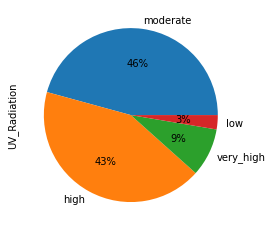

In [69]:
Dataframe['UV_Radiation'].value_counts().head().plot.pie(autopct='%.0f%%')

In [70]:
# Contagem da quantidade de registros com tal caracteristica:
Dataframe.UV_Radiation.value_counts()

moderate     1449
high         1351
very_high     284
low            84
Name: UV_Radiation, dtype: int64

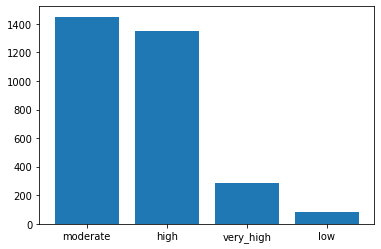

In [71]:
plt.bar(Dataframe.UV_Radiation.value_counts().index, Dataframe.UV_Radiation.value_counts().values);

In [ ]:
Dataframe.drop(Dataframe.index[Dataframe['UV_Radiation'] == 'very_high'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['UV_Radiation'] == 'low'], inplace = True)

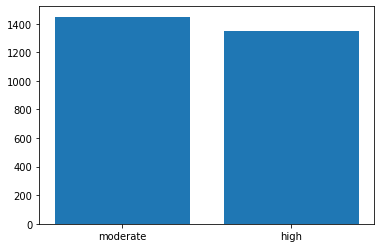

In [73]:
plt.bar(Dataframe.UV_Radiation.value_counts().index, Dataframe.UV_Radiation.value_counts().values);

In [89]:
label_encoder = LabelEncoder()
upd_radiation = label_encoder.fit_transform(Dataframe.UV_Radiation)
upd_radiation

array([1, 1, 1, ..., 0, 0, 0])

In [90]:
Dataframe['UV_Radiation'] = upd_radiation

In [91]:
Soloframe = Dataframe[['min_ground_temp(°C)', 'max_ground_temp(°C)', 'UV_Radiation']]
Soloframe

,min_ground_temp(°C),max_ground_temp(°C),UV_Radiation
0,-71,-3,1
1,-72,-3,1
2,-70,-4,1
3,-70,-6,1
4,-71,-7,1
...,...,...,...
3096,-65,-4,0
3097,-66,-5,0
3098,-66,-8,0
3099,-66,-6,0


### área de Gráficos - Testes de váriaveis


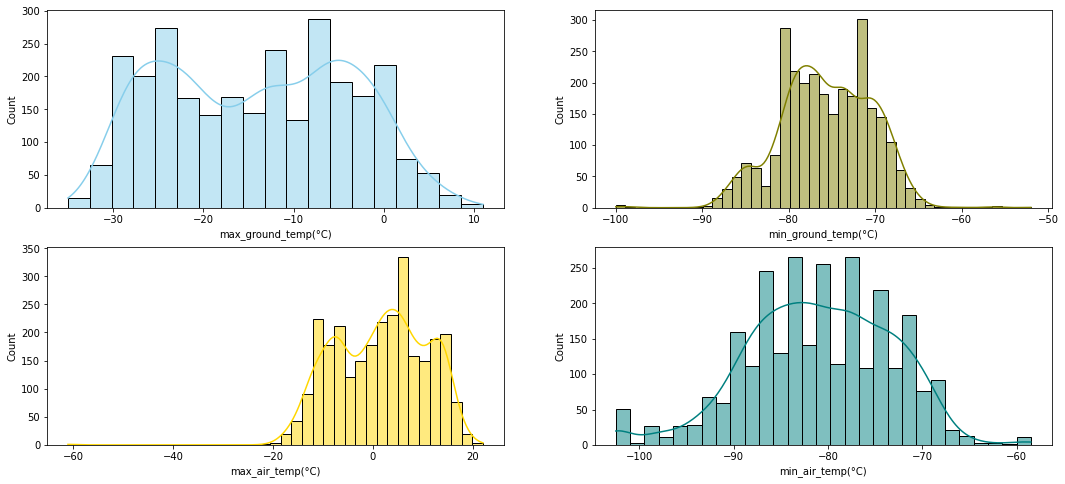

In [92]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

sb.histplot(data=Dataframe, x='max_ground_temp(°C)', kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data=Dataframe, x='min_ground_temp(°C)', kde=True, color="olive", ax=axs[0, 1])
sb.histplot(data=Dataframe, x='max_air_temp(°C)', kde=True, color="gold", ax=axs[1, 0])
sb.histplot(data=Dataframe, x='min_air_temp(°C)', kde=True, color="teal", ax=axs[1, 1])

plt.show()

### Identificação de Outliers:

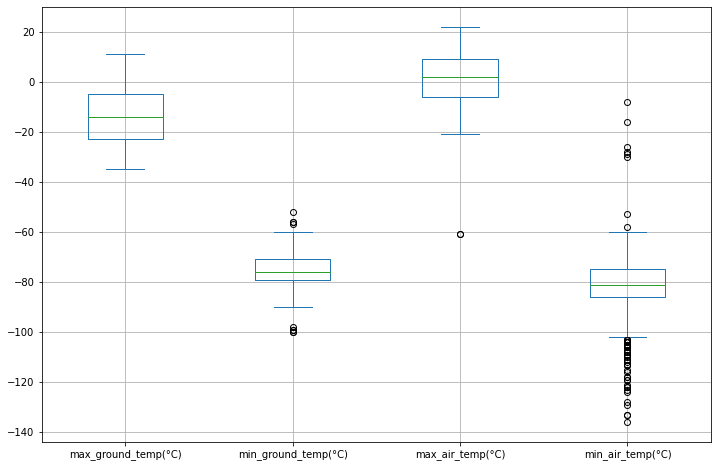

In [78]:
colunas = ['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)']
Dataframe[colunas].plot.box(grid = True, figsize=(12,8))

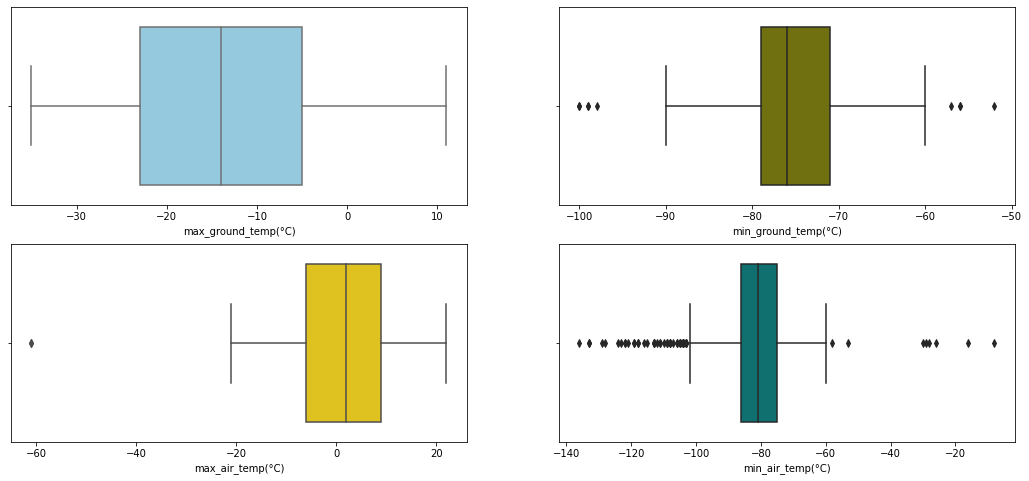

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

sb.boxplot(data=Dataframe, x='max_ground_temp(°C)', color="skyblue", ax=axs[0, 0])
sb.boxplot(data=Dataframe, x='min_ground_temp(°C)',  color="olive", ax=axs[0, 1])
sb.boxplot(data=Dataframe, x='max_air_temp(°C)', color="gold", ax=axs[1, 0])
sb.boxplot(data=Dataframe, x='min_air_temp(°C)', color="teal", ax=axs[1, 1])

plt.show()

In [80]:
Dataframe['min_air_temp(°C)'].describe()

count    2800.000000
mean      -81.105714
std         8.699639
min      -136.000000
25%       -86.000000
50%       -81.000000
75%       -75.000000
max        -8.000000
Name: min_air_temp(°C), dtype: float64

In [81]:
#trata outlier pela regra do 1.5*IQR (variação interquartil)

q1 = Dataframe['min_air_temp(°C)'].quantile(0.25)
print(f'q1: {q1}')
q3 = Dataframe['min_air_temp(°C)'].quantile(0.75)
print(f'q3: {q3}')
iqr = q3 - q1
print(f'iqr: {iqr}')
lLim = q1 - 1.5 * iqr 
print(f'lLim: {lLim}')
hLim = q3 + 1.5 * iqr
print(f'hLim: {hLim}')

q1: -86.0
q3: -75.0
iqr: 11.0
lLim: -102.5
hLim: -58.5


In [82]:
#SUBSTITUI VALORES CONSIDERADOS OUTLIER

Dataframe.loc[Dataframe['min_air_temp(°C)'] < lLim, 'min_air_temp(°C)'] = lLim #substitui os valores abaixo do limite inferior pelo limite inferior
Dataframe.loc[Dataframe['min_air_temp(°C)'] > hLim, 'min_air_temp(°C)'] = hLim #substitui os valores acima do limite superior pelo limite superior

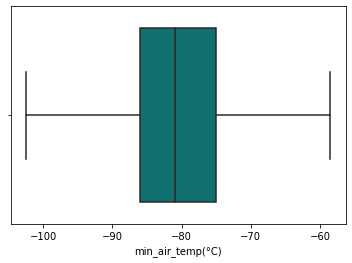

In [97]:
sb.boxplot(data=Dataframe, x='min_air_temp(°C)', color="teal")
plt.show()

In [83]:
Dataframe[colunas].describe()

,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C)
count,2800.000000,2800.000000,2800.000000,2800.000000
mean,-14.001429,-75.686071,1.481786,-81.018750
std,10.371829,5.278356,9.095167,7.687568
min,-35.000000,-100.000000,-61.000000,-102.500000
25%,-23.000000,-79.000000,-6.000000,-86.000000
50%,-14.000000,-76.000000,2.000000,-81.000000
75%,-5.000000,-71.000000,9.000000,-75.000000
max,11.000000,-52.000000,22.000000,-58.500000


### Gráfico de Dispersão:

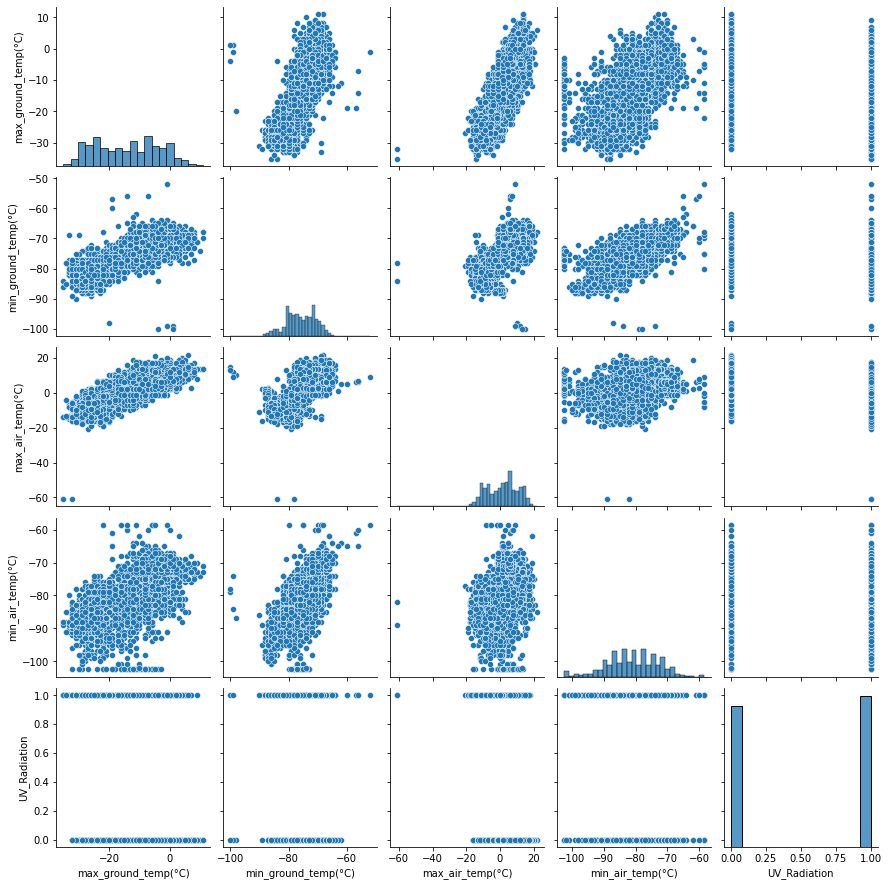

In [93]:
sb.pairplot(data=Dataframe[['max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)', 'min_air_temp(°C)', 'UV_Radiation']])

### Correlações:

Verifica o quão fortemente dois atributos estão correlacionados entre si. Uma medida de correlação clássica é o coeficiente de correlação de Pearson que mede o grau de correlação e a direção dessa correlação, se positiva ou negativa.

Esse coeficiente assume apenas valores entre -1 e 1, onde:


> 1 significa uma correlação perfeita positiva entre as duas variáveis;
-1 significa uma correlação perfeita negativa entre as duas variáveis, ou seja, se uma aumenta a outra diminui;
0 significa que as duas variáveis não dependem linearmente uma da outra
Pode-se dizer ainda que, considerando os valores positivos ou negativos:
*  0 < corr < 0.3 significa fraca correlação;
*  0.3 < corr < 0.7 significa correlação moderada;
*  0.7 < corr < 1 significa correlação forte.

Uma correlação negativa é uma relação entre duas variáveis ​​que se movem em direções opostas. Em outras palavras, quando a variável A aumenta, a variável B diminui.

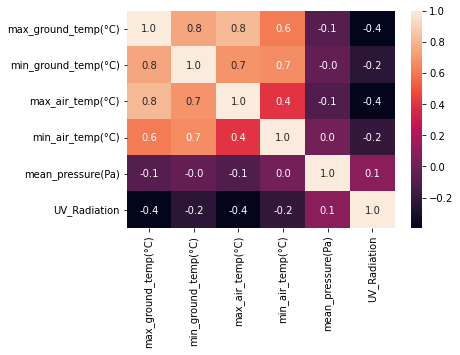

In [94]:
corr = Dataframe.select_dtypes(exclude='object').corr()
sb.heatmap(corr, annot=True, fmt=".1f")

## ***Capitulo 4:*** Analise Explicita:

Introdução:
> Nessa analise temos que realçar os dados que estão explicitos nas tabelas e a partir de operações de ordenação e rotulagem os transformar em informações;

Ferramentas:
*   Filtros
*   Criações de colunas

